In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv("data/tmdb_5000_movies.csv")
credits = pd.read_csv("data/tmdb_5000_credits.csv")

In [3]:
movies.shape

(4803, 20)

In [4]:
credits.shape

(4803, 4)

In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
v = movies['vote_count']
R = movies['vote_average']
C = movies['vote_average'].mean()
m = movies['vote_average'].quantile(0.70)

In [8]:
movies['weighed_average'] = (((R * v) + (C*m))/(v+m)) 

In [9]:
movies_sorted_ranking = movies.sort_values('weighed_average',ascending = False)


In [10]:
movies_sorted_ranking[['original_title','vote_count','vote_average','weighed_average','popularity']].head(20)

,original_title,vote_count,vote_average,weighed_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.498035,136.747729
3337,The Godfather,5893,8.4,8.397379,143.659698
662,Fight Club,9413,8.3,8.298430,146.757391
3232,Pulp Fiction,8428,8.3,8.298246,121.463076
1818,Schindler's List,4329,8.3,8.296588,104.469351
3865,Whiplash,4254,8.3,8.296528,192.528841
2294,千と千尋の神隠し,3840,8.3,8.296155,118.968562
2731,The Godfather: Part II,3338,8.3,8.295577,105.792936
65,The Dark Knight,12002,8.2,8.198824,187.322927
809,Forrest Gump,7927,8.2,8.198220,138.133331


In [20]:
average = movies_sorted_ranking[['original_title','vote_count','vote_average','weighed_average','popularity']].head(10)

In [21]:
average

,original_title,vote_count,vote_average,weighed_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.498035,136.747729
3337,The Godfather,5893,8.4,8.397379,143.659698
662,Fight Club,9413,8.3,8.298430,146.757391
3232,Pulp Fiction,8428,8.3,8.298246,121.463076
1818,Schindler's List,4329,8.3,8.296588,104.469351
3865,Whiplash,4254,8.3,8.296528,192.528841
2294,千と千尋の神隠し,3840,8.3,8.296155,118.968562
2731,The Godfather: Part II,3338,8.3,8.295577,105.792936
65,The Dark Knight,12002,8.2,8.198824,187.322927
809,Forrest Gump,7927,8.2,8.198220,138.133331


In [34]:
weight_average=movies_sorted_ranking.sort_values('weighed_average',ascending=False)

Text(0, 0.5, 'Movie Title')

/home/asus/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/asus/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/asus/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23563 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/asus/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/asus/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/asus/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38

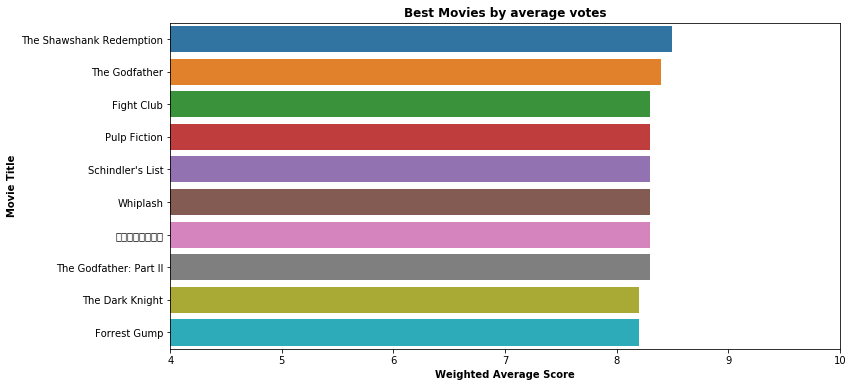

In [58]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighed_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4,10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [47]:
popularity=movies_sorted_ranking.sort_values('popularity',ascending=False)

Text(0, 0.5, 'Movie Title')

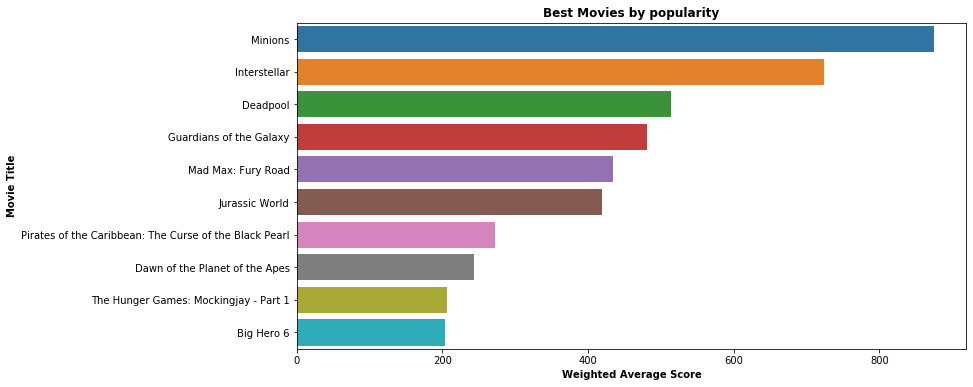

In [59]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)
plt.title('Best Movies by popularity', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
movies_scaled = scaling.fit_transform(movies[['weighed_average','popularity']])
movies_normalized_df = pd.DataFrame(movies_scaled,columns = ['weighed_average','popularity'])
movies_normalized_df.head()

,weighed_average,popularity
0,0.780797,0.171815
1,0.730063,0.158846
2,0.628938,0.122635
3,0.848232,0.128272
4,0.595228,0.050169


In [53]:
movies[['normalized_weighed_average','normalized_popularity']] = movies_normalized_df

In [55]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,weighed_average,normalized_weighed_average,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.199371,0.780797,0.171815
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,6.898799,0.730063,0.158846
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,6.299689,0.628938,0.122635
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,7.598891,0.848232,0.128272
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,6.099975,0.595228,0.050169


In [56]:
movies['score'] = (movies['normalized_weighed_average'] * 0.5 + movies['normalized_popularity'] * 0.5)
movies_scored_df = movies.sort_values('score',ascending = False)
movies_scored_df[['original_title','vote_count','vote_average','score']].head(20)

,original_title,vote_count,vote_average,score
95,Interstellar,10867,8.1,0.879884
546,Minions,4571,6.4,0.822897
94,Guardians of the Galaxy,9742,7.9,0.724155
788,Deadpool,10995,7.4,0.701108
127,Mad Max: Fury Road,9427,7.2,0.638379
3865,Whiplash,4254,8.3,0.592937
65,The Dark Knight,12002,8.2,0.581718
1881,The Shawshank Redemption,8205,8.5,0.578090
3337,The Godfather,5893,8.4,0.573542
199,Pirates of the Caribbean: The Curse of the Bla...,6985,7.5,0.570966


Text(0, 0.5, 'Movie Title')

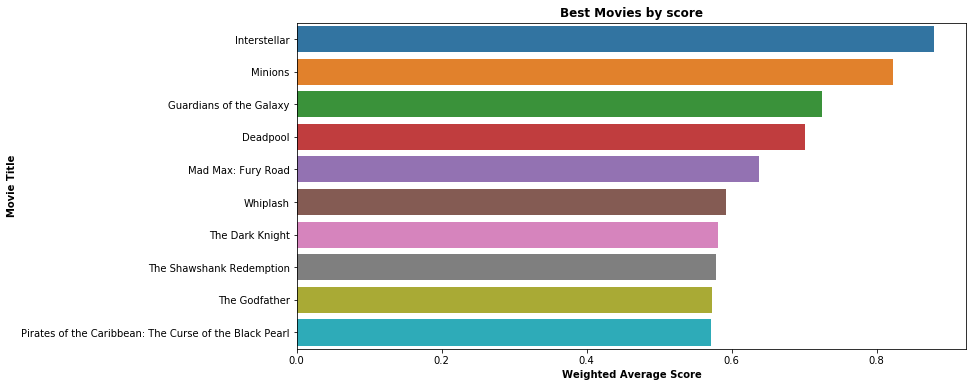

In [63]:
plt.figure(figsize= (12,6))
axis1 = sns.barplot(x = movies_scored_df['score'].head(10),y = movies_scored_df['original_title'].head(10),data = movies_scored_df)
plt.title('Best Movies by score', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')